In [35]:
# $\def\*#1{\mathbf{#1}}$
import os
import sys
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

#os.listdir("../../")
sys.path.append("../../")

%matplotlib inline

In [54]:
#SYMPY REFERENCE https://minireference.com/static/tutorials/sympy_tutorial.pdf
#$\def\*#1{\mathbf{#1}}$

from sympy import *
from sympy.interactive import printing
import sympy
from sympy import Eq
import sympy as sym
from sympy.abc import theta, phi, alpha, tau
from __future__ import division
from scipy.stats import pareto
from random import randint
from sympy import Symbol
#from mpmath import *
import numpy as np

printing.init_printing(use_latex='mathjax')


K = 3 #Number of communities
nk = symbols("n_0:"+str(K),integer=True) 
K = Symbol("K",integer=True)
pk = Symbol("p",real=True)
lamb = Symbol("\\lambda",function=True)
theta = Symbol("\\theta")
F = symbols("\Gamma_0:"+str(K),function=True)
G = Symbol("\Gamma",function=True)
alpha = Symbol("\\alpha",function=True)
beta = Symbol("\\beta")
Alphas =  symbols("\\alpha_0:"+str(K))
x, y , w, s, c, u, a, b,v  = symbols("x y w s c u a b v")
sig = Symbol("\sigma")
E = [Symbol("\Gamma_{\\alpha_"+str(i)+"}",function=True)(x) for i in range(10)]
k, n = symbols("k n", integer=True)
t = symbols("t",real=True)
P = symbols("P",function=True)
Z = Symbol("Z")
z = Symbol("z",function=True)
p = Symbol("p",function=True)
N = Symbol("N",integer=True)
I = Symbol("|")
q =  Symbol("q",function=True)
Expectation = Symbol("\\mathbb{E}",function=True)

In [15]:
#==========================
# GRAPH VARIABLES
#==========================
Da = Symbol("D^{*}_{\\alpha}")
Da

#==========================
# Densities variables
#==========================
Indicator = Symbol("\\mathbb{I}")
Indicator_tilted = Symbol("\\mathbb{I}_{\{ \\tau + (\\frac{\\alpha}{c})^{\\frac{1}{\\alpha}} \leq t \leq \\tau^{-1} \}}")

In [16]:
print latex(((alpha*(t**(-alpha-1))*Indicator_tilted)/((tau+(alpha/c)**(1/alpha))**alpha - tau**alpha)).subs(alpha,sig))

\frac{\mathbb{I}_{\{ \tau + (\frac{\alpha}{c})^{\frac{1}{\alpha}} \leq t \leq \tau^{-1} \}} \sigma}{- \tau^{\sigma} + \left(\tau + \left(\frac{\sigma}{c}\right)^{\frac{1}{\sigma}}\right)^{\sigma}} t^{- \sigma - 1}


In [17]:
tilted_no_indicator = ((alpha*(t**(-alpha-1)))/((tau+(alpha/c)**(1/alpha))**alpha - tau**alpha))
tilted_no_indicator = tilted_no_indicator.subs(alpha,sig).subs(c,1/K)
tilted_no_indicator

                  -\sigma - 1           
          \sigma⋅t                      
────────────────────────────────────────
                                  \sigma
   \sigma   ⎛    \sigma__________⎞      
- τ       + ⎝τ +     ╲╱ K⋅\sigma ⎠      

In [18]:
tilted_no_indicator_integrated = integrate(tilted_no_indicator,(t,a,b))
tilted_no_indicator_integrated

         ⎛⎧  log(a)    for -\sigma - 1 = -1⎞          ⎛⎧  log(b)    for -\sigm
         ⎜⎪                                ⎟          ⎜⎪                      
         ⎜⎪  -\sigma                       ⎟          ⎜⎪  -\sigma             
  \sigma⋅⎜⎨-a                              ⎟   \sigma⋅⎜⎨-b                    
         ⎜⎪──────────       otherwise      ⎟          ⎜⎪──────────       other
         ⎜⎪  \sigma                        ⎟          ⎜⎪  \sigma              
         ⎝⎩                                ⎠          ⎝⎩                      
- ────────────────────────────────────────── + ───────────────────────────────
                                     \sigma                                   
      \sigma   ⎛    \sigma__________⎞              \sigma   ⎛    \sigma_______
   - τ       + ⎝τ +     ╲╱ K⋅\sigma ⎠           - τ       + ⎝τ +     ╲╱ K⋅\sig

a - 1 = -1⎞
          ⎟
          ⎟
          ⎟
wise      ⎟
          ⎟
          ⎠
───────────
    \sigma 
___⎞       
ma ⎠      

In [19]:
tilted_no_indicator_integrated.args

⎛       ⎛⎧  log(b)    for -\sigma - 1 = -1⎞          ⎛⎧  log(a)    for -\sigma
⎜       ⎜⎪                                ⎟          ⎜⎪                       
⎜       ⎜⎪  -\sigma                       ⎟          ⎜⎪  -\sigma              
⎜\sigma⋅⎜⎨-b                              ⎟  -\sigma⋅⎜⎨-a                     
⎜       ⎜⎪──────────       otherwise      ⎟          ⎜⎪──────────       otherw
⎜       ⎜⎪  \sigma                        ⎟          ⎜⎪  \sigma               
⎜       ⎝⎩                                ⎠          ⎝⎩                       
⎜──────────────────────────────────────────, ─────────────────────────────────
⎜                                   \sigma                                    
⎜    \sigma   ⎛    \sigma__________⎞              \sigma   ⎛    \sigma________
⎝ - τ       + ⎝τ +     ╲╱ K⋅\sigma ⎠           - τ       + ⎝τ +     ╲╱ K⋅\sigm

 - 1 = -1⎞ ⎞
         ⎟ ⎟
         ⎟ ⎟
         ⎟ ⎟
ise      ⎟ ⎟
         ⎟ ⎟
         ⎠ ⎟
───────────⎟
   \sigma  ⎟
__⎞        ⎟


In [20]:
Ia = (tilted_no_indicator_integrated.args[0].args[0]*tilted_no_indicator_integrated.args[0].args[1])*tilted_no_indicator_integrated.args[0].args[-1].args[1].args[0]
Ib = tilted_no_indicator_integrated.args[1].args[-1].args[1][0]*(tilted_no_indicator_integrated.args[1].args[0]*tilted_no_indicator_integrated.args[1].args[1]*tilted_no_indicator_integrated.args[1].args[2])
IntegralFrom_a_to_b = Ia + Ib 
IntegralFrom_a_to_b

                   -\sigma                                    -\sigma         
                  b                                          a                
- ──────────────────────────────────────── + ─────────────────────────────────
                                    \sigma                                    
     \sigma   ⎛    \sigma__________⎞            \sigma   ⎛    \sigma__________
  - τ       + ⎝τ +     ╲╱ K⋅\sigma ⎠         - τ       + ⎝τ +     ╲╱ K⋅\sigma 

       
       
───────
 \sigma
⎞      
⎠      

In [24]:
cumulative_function =  IntegralFrom_a_to_b.subs(a,left_border).subs(b,x)
cumulative_function

                           -\sigma                                            
     ⎛         1          ⎞                                                   
     ⎜────────────────────⎟                                                   
     ⎜    \sigma__________⎟                                 -\sigma           
     ⎝τ +     ╲╱ K⋅\sigma ⎠                                x                  
──────────────────────────────────────── - ───────────────────────────────────
                                  \sigma                                     \
   \sigma   ⎛    \sigma__________⎞            \sigma   ⎛    \sigma__________⎞ 
- τ       + ⎝τ +     ╲╱ K⋅\sigma ⎠         - τ       + ⎝τ +     ╲╱ K⋅\sigma ⎠ 

     
     
     
     
     
─────
sigma
     
     

In [25]:
left_border = (1/((tau+(alpha/c)**(1/alpha))).subs(c,1/K)).subs(alpha,sig)
right_border = (1/tau)

In [26]:
In =  integrate(alpha*t**(-1-alpha),(t,a,b))
I = -b**(-alpha)+a**(-alpha)
I = I.subs(alpha,sig)
I.subs(a,left_border).subs(b,right_border)

                      -\sigma      -\sigma
⎛         1          ⎞          ⎛1⎞       
⎜────────────────────⎟        - ⎜─⎟       
⎜    \sigma__________⎟          ⎝τ⎠       
⎝τ +     ╲╱ K⋅\sigma ⎠                    

In [27]:
I.subs(a,left_border).subs(b,x)

                      -\sigma           
⎛         1          ⎞           -\sigma
⎜────────────────────⎟        - x       
⎜    \sigma__________⎟                  
⎝τ +     ╲╱ K⋅\sigma ⎠                  

In [28]:
left_border

         1          
────────────────────
    \sigma__________
τ +     ╲╱ K⋅\sigma 

In [29]:
right_border

1
─
τ

In [30]:
eq = Eq(cumulative_function,y)
eq

                           -\sigma                                            
     ⎛         1          ⎞                                                   
     ⎜────────────────────⎟                                                   
     ⎜    \sigma__________⎟                                 -\sigma           
     ⎝τ +     ╲╱ K⋅\sigma ⎠                                x                  
──────────────────────────────────────── - ───────────────────────────────────
                                  \sigma                                     \
   \sigma   ⎛    \sigma__________⎞            \sigma   ⎛    \sigma__________⎞ 
- τ       + ⎝τ +     ╲╱ K⋅\sigma ⎠         - τ       + ⎝τ +     ╲╱ K⋅\sigma ⎠ 

         
         
         
         
         
───── = y
sigma    
         
         

In [31]:
solve(eq,x)

⎡                _____________________________________________________________
⎢               ╱                                                             
⎢              ╱                                        ⎛         1          ⎞
⎢             ╱                                         ⎜────────────────────⎟
⎢            ╱                                          ⎜    \sigma__________⎟
⎢           ╱                                           ⎝τ +     ╲╱ K⋅\sigma ⎠
⎢          ╱      ────────────────────────────────────────────────────────────
⎢         ╱                                       \sigma                      
⎢        ╱         \sigma   ⎛         1          ⎞           ⎛    \sigma______
⎢       ╱         τ      ⋅y⋅⎜────────────────────⎟       - y⋅⎝τ +     ╲╱ K⋅\si
⎢\sigma╱                    ⎜    \sigma__________⎟                            
⎣    ╲╱                     ⎝τ +     ╲╱ K⋅\sigma ⎠                            

_____________________________________________⎤
\sig

In [34]:
print latex(solve(eq,x)[0].simplify())

\left(\frac{\left(\frac{1}{\tau + \left(K \sigma\right)^{\frac{1}{\sigma}}}\right)^{\sigma}}{\tau^{\sigma} y \left(\frac{1}{\tau + \left(K \sigma\right)^{\frac{1}{\sigma}}}\right)^{\sigma} - y \left(\tau + \left(K \sigma\right)^{\frac{1}{\sigma}}\right)^{\sigma} \left(\frac{1}{\tau + \left(K \sigma\right)^{\frac{1}{\sigma}}}\right)^{\sigma} + 1}\right)^{\frac{1}{\sigma}}


In [60]:
def inverseCumulativeFunction(uniformVariable,*parameters):
    sigma=parameters[0]
    tau = parameters[1]
    K = parameters[2]
    
    A = tau + (K*sigma)**(1./sigma)
    A_inv = 1./A
    
    B = (tau**sigma)*uniformVariable*(A_inv**sigma) 
    B = B - uniformVariable + 1
    
    return ((A_inv**sigma)/B)**(1/sigma)

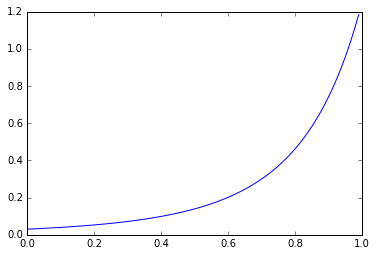

In [63]:
U = np.linspace(0.001,0.99,100)
Inv = inverseCumulativeFunction(U,0.2,0.8,10)
plt.plot(U,Inv)

In [ ]:
def generateFiniteGeneralizedGamma(sigma,tau,K):
    """
    """
    return None

# BFRY Densities

In [28]:
Numerator = (alpha*s**(-alpha-1)*(exp(-tau*s))*(1-exp(-(alpha/c)**(1/alpha))*s))
Denominator = G(1-alpha)*((tau+(alpha/c)**(1/alpha))**alpha - tau**alpha)
bfry_density = (Numerator/Denominator)

In [29]:
bfry_density.subs(alpha,sig)

                        ⎛              ________    ⎞          
                        ⎜             ╱ \sigma     ⎟          
                        ⎜     -\sigma╱  ──────     ⎟          
            -\sigma - 1 ⎜          ╲╱     c        ⎟  -s⋅τ    
    \sigma⋅s           ⋅⎝- s⋅ℯ                  + 1⎠⋅ℯ        
──────────────────────────────────────────────────────────────
⎛                                  \sigma⎞                    
⎜            ⎛            ________⎞      ⎟                    
⎜   \sigma   ⎜           ╱ \sigma ⎟      ⎟                    
⎜- τ       + ⎜τ + \sigma╱  ────── ⎟      ⎟⋅\Gamma(-\sigma + 1)
⎝            ⎝        ╲╱     c    ⎠      ⎠                    

In [30]:
bfry_density_function = Symbol("g_{1/K,\sigma}",function=True)
bfry_density_function

g_{1/K,\sigma}

# Plots of Gamma

In [13]:
def collectTermsWithVariable(expression,variable):
    return Add(*[argi for argi in expression.args if argi.has(variable)])

def subsParentesis(expresion,p,w,krange):
    for k in range(*krange):
        expresion = expresion.subs(p(k),w(k))
    return expresion

def subsParentesisDouble(expresion,p,w,krange):
    for u in range(*krange):
        for v in range(*krange):
            expresion = expresion.subs(p(u,v),w(u,v))
    return expresion

def backToSubIndice(expresion,p,krange):
    for k in range(*krange):
        expresion = expresion.subs(p(k),Symbol(str(p)+"_{0}".format(k)))
    return expresion

def backToSubIndiceDouble(expresion,p,krange):
    for u in range(*krange):
        for v in range(*krange):
            expresion = expresion.subs(p(u,v),Symbol(str(p)+"_{0},{1}".format(u,v)))
    return expresion

def backToSuperIndice(expresion,p,krange):
    for k in range(*krange):
        expresion = expresion.subs(p(k),Symbol(str(p)+"^{0}".format(k)))
    return expresion